## **Problem Statement**

### **Business Context**


The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express believe that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### **Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

### **Data Description**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second 3. group (treatment)
4. landing_page - Whether the landing page is new or old
5. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
6. converted - Whether the user gets converted to a subscriber of the news portal or not
7. language_preferred - language chosen by the user to view the landing page

## **Import the necessary libraries**


In [ ]:
!pip install numpy pandas matplotlib seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
# importing normal distribution functions
from scipy.stats import norm
from scipy.stats import f_oneway

## **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/NewsFlash Project/AB_Testing.csv"
data = pd.read_csv(path)

## **Data Overview**

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### **Displaying the first few rows of the dataset**

In [ ]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


### **Checking the shape of the dataset**

In [ ]:
# checking the shape of the data
data.shape

(100, 6)

* There are 100 rows and 6 columns.

### **Checking the data types of the columns for the dataset**

In [ ]:
# inspecting the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are 2 numeric features (user_id, time_spent_on_the_page) and 4 categorical features (group, landing_page, converted, language_preferred).

### **Checking for duplicate values**

In [ ]:
# Check duplicate rows
data.duplicated().sum()

np.int64(0)

No duplicate rows in a DataFrame.

### **Checking for null values**

In [ ]:
data.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


There are no null values

### **Checking for missing values**

In [ ]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

,0
user_id,0.0
group,0.0
landing_page,0.0
time_spent_on_the_page,0.0
converted,0.0
language_preferred,0.0


There are no missing values

### **Statistical summary of the dataset**

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The dataset has 100 rows and 6 columns.

- There are no missing values in the dataset.

- There are no duplicate values.

- Numeric features: user_id, time_spent_on_the_page.

- Categorical features: group, landing_page, converted, language_preferred.

- user_id ranges from 546,443 to 546,592, showing unique identifiers.

- time_spent_on_the_page ranges from 0.19 to 10.71 minutes, with a mean of 5.38 and median of 5.42, indicating it is fairly symmetric.

- The dataset is a balanced experiment with groups: control (50) and treatment (50).

- The landing page is equally split between old (50) and new (50).

- Conversion rate: yes (54 users) and no (46 users), showing a slight majority converted.

- The most common preferred language is Spanish (34 users), followed by other languages.

### **Visualizing the unique values in each categorical column to see if there are any strange values**

In [ ]:
# categorial columns
obj_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in obj_col:
    print(data[column].value_counts(True))
    print("-" * 50)

group
control      0.5
treatment    0.5
Name: proportion, dtype: float64
--------------------------------------------------
landing_page
old    0.5
new    0.5
Name: proportion, dtype: float64
--------------------------------------------------
converted
yes    0.54
no     0.46
Name: proportion, dtype: float64
--------------------------------------------------
language_preferred
Spanish    0.34
French     0.34
English    0.32
Name: proportion, dtype: float64
--------------------------------------------------


• user_id can be removed as it is just an identifier and not needed for analysis

• 50% of the users are in the control group and 50% in the treatment group

• 50% of the users saw the old landing page and 50% saw the new landing page

• 54% of the users converted, while 46% did not convert

• Language preference is fairly balanced: 34% Spanish, 34% French, and 32% English

• The target variable (converted) is relatively balanced

In [ ]:
# Remove Case ID
data.drop(["user_id"], axis=1, inplace=True)

## **Exploratory Data Analysis (EDA)**

### The below functions need to be defined to carry out the EDA.

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### **Univariate analysis**

#### **1. Observations on group**

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


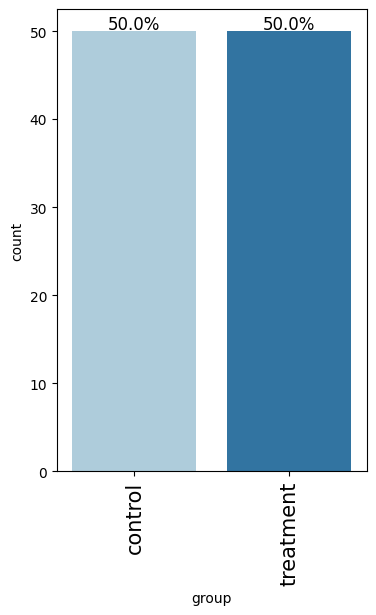

In [ ]:
labeled_barplot(data, "group", perc=True)

- The control and treatment groups are evenly distributed, with each making up 50% of the total sample.

#### **2. Observations on landing_page**

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


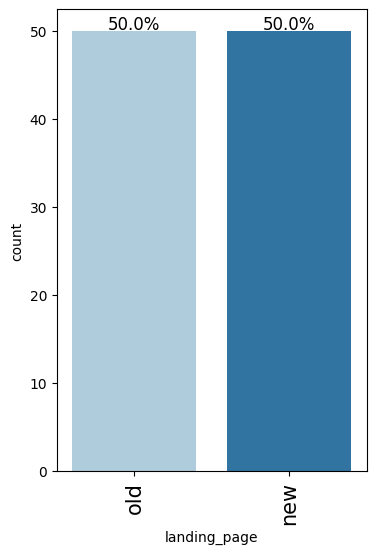

In [ ]:
labeled_barplot(data, "landing_page", perc=True)

- The old and new landing pages are equally represented, each accounting for 50% of the total observations.

#### **3. Observations on time_spent_on_the_page**

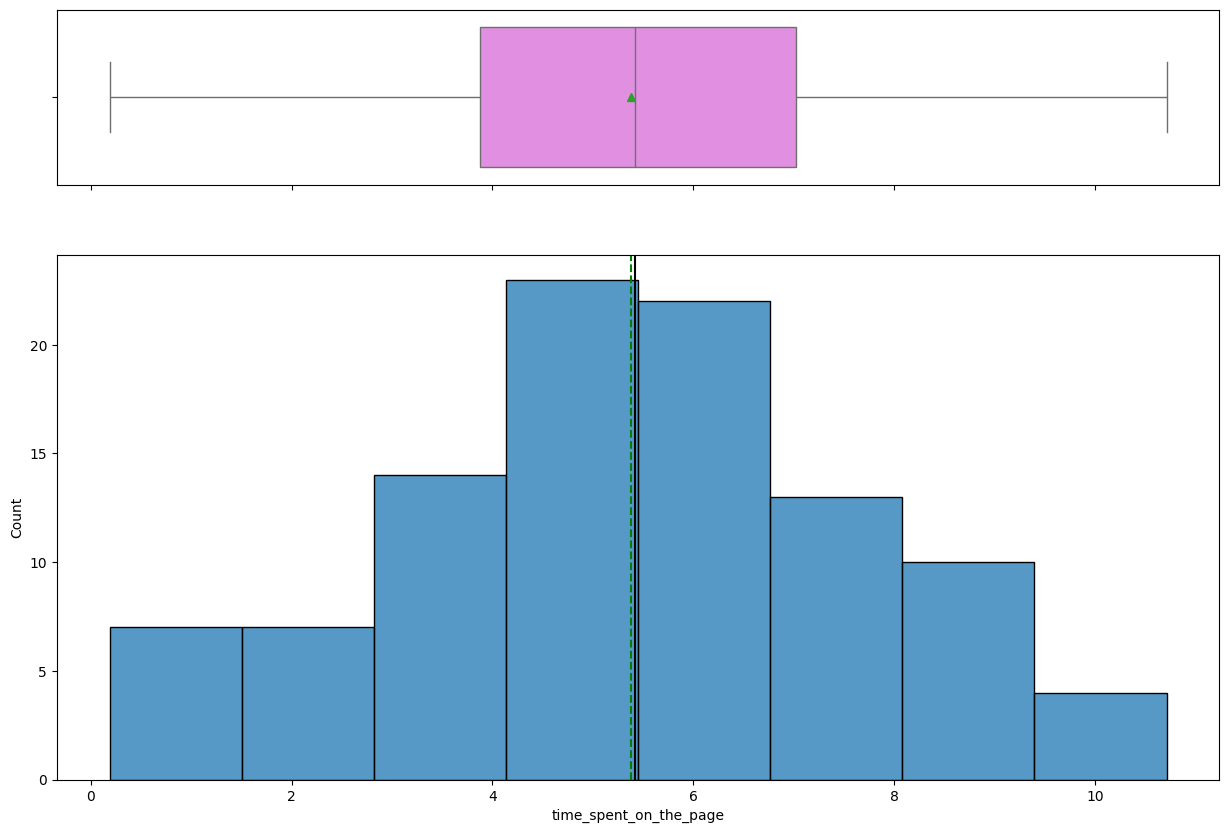

In [ ]:
histogram_boxplot(data,'time_spent_on_the_page')

- The time spent on the page is roughly normally distributed around 5–6 minutes, with most users clustering near the center and no extreme outliers observed.

#### **4. Observations on converted**

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


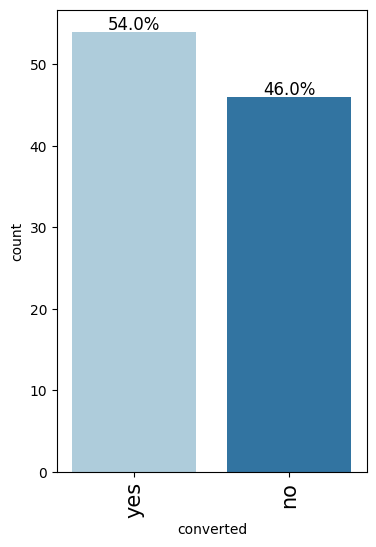

In [ ]:
labeled_barplot(data, "converted", perc=True)

- A slightly higher proportion of users converted (54%) compared to those who did not (46%).

#### **5. Observations on language_preferred**

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


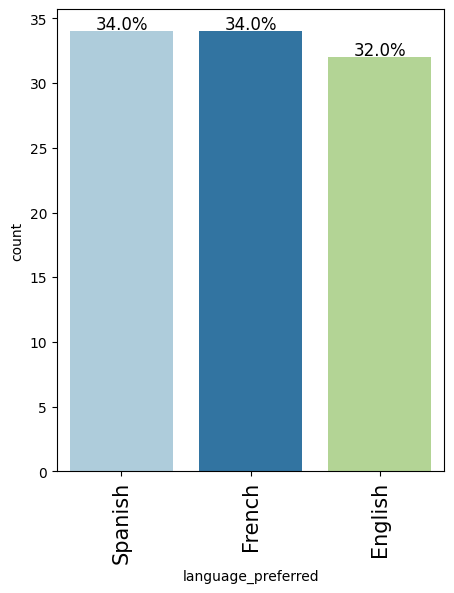

In [ ]:
labeled_barplot(data, "language_preferred", perc=True)

- The preferred languages are almost evenly distributed, with Spanish and French at 34% each and English slightly lower at 32%.

### **Bivariate Analysis**

#### **1. Group vs Converted**

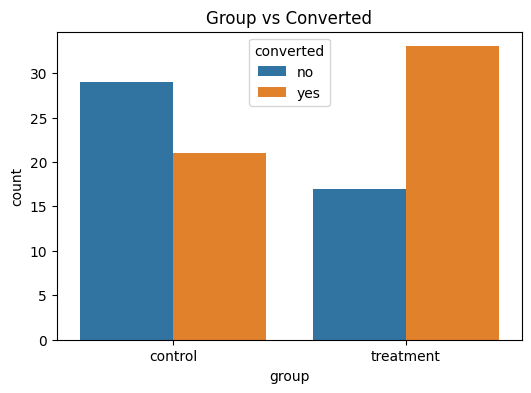

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="group", hue="converted", data=data)
plt.title("Group vs Converted")
plt.show()

- Treatment group shows a higher proportion of conversions compared to the control group.

- Suggests that the new landing page might be more effective.

#### **2. Landing Page vs Time Spent on the Page**

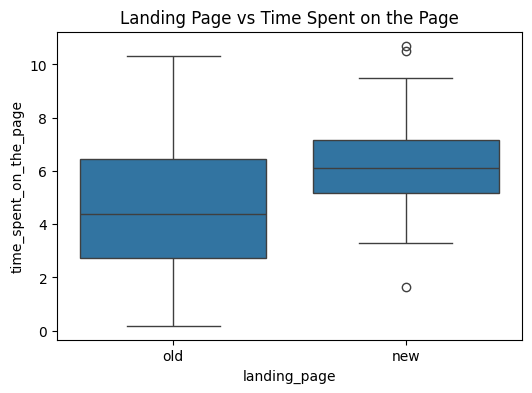

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data=data)
plt.title("Landing Page vs Time Spent on the Page")
plt.show()

- Users tend to spend more time on the new landing page compared to the old one.

- Indicates improved engagement with the new design.

#### **3. Landing Page vs Conversion**

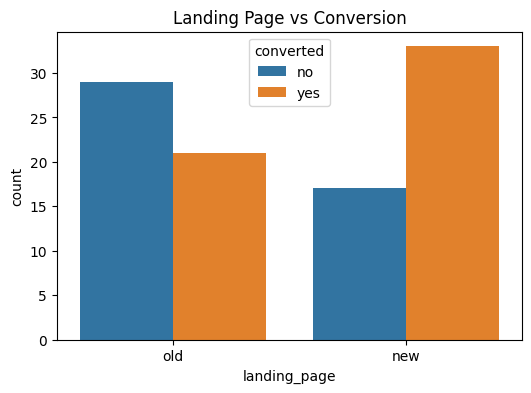

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="landing_page", hue="converted", data=data)
plt.title("Landing Page vs Conversion")
plt.show()

- Conversion rate is higher for the new landing page compared to the old page.

- Confirms potential effectiveness of the redesign.

#### **4. Language Preferred vs Conversion**

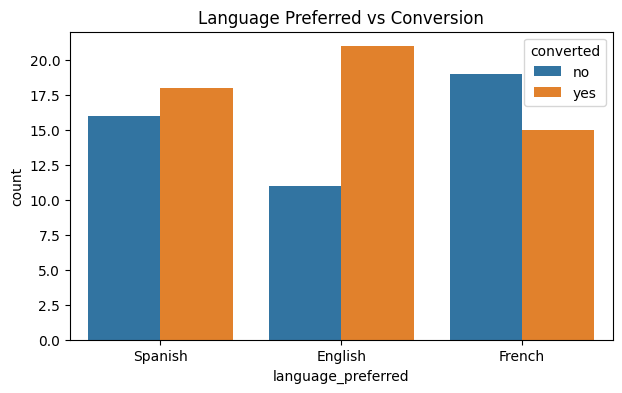

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x="language_preferred", hue="converted", data=data)
plt.title("Language Preferred vs Conversion")
plt.show()

- English users have the highest conversion rate.

- French users show lower conversion compared to Spanish and English users.

#### **5. Language Preferred vs Time Spent on the Page**

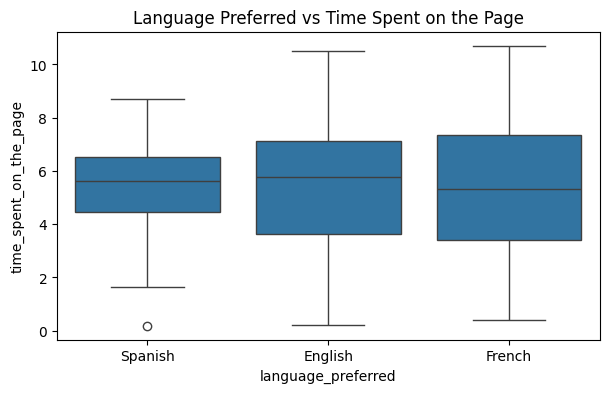

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data=data)
plt.title("Language Preferred vs Time Spent on the Page")
plt.show()

- Average time spent is relatively similar across languages, with English and French slightly higher than Spanish.

- Suggests language preference has limited effect on engagement time.

## **1. Do the users spend more time on the new landing page than on the existing landing page?**

### **1. Perform Visual Analysis**

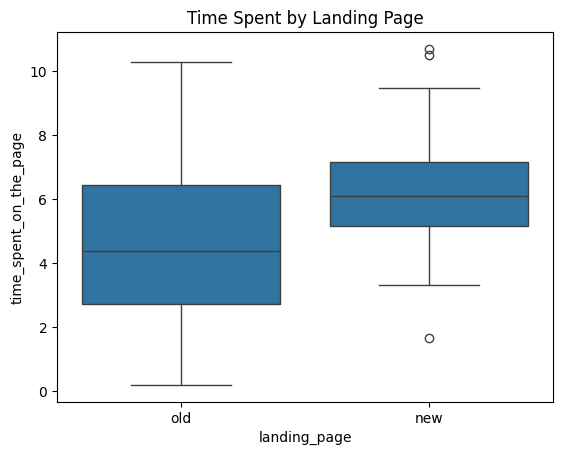

In [ ]:
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=data)
plt.title("Time Spent by Landing Page")
plt.show()

- Users tend to spend more time on the new landing page (median ~6) compared to the old landing page (median ~4), with the old page showing greater variability and more extreme low values.

### **2. Hypotheses**

- H₀ (Null): Mean time spent on the new landing page = Mean time spent on the old landing page.

- H₁ (Alternative): Mean time spent on the new landing page > Mean time spent on the old landing page.

### **3. Appropriate Test**

- Comparing two independent groups’ means → Independent two-sample t-test (one-tailed).

- If normality/variance assumptions fail → Mann-Whitney U test.

To determine if users spend significantly more time on the new landing page, an independent two-sample t-test is employed as we are comparing the means of a continuous variable **(time spent)** between two independent groups **(users on the old vs. new landing page)**. The Mann-Whitney U test would be considered if the assumptions for the t-test were not met. So for this we are using **independent two-sample t-test**.

### **4. Decide the significance level**

Here, we select @ = 0.05

### **5. Data Prep**

In [ ]:
old = data[data['landing_page']=='old']['time_spent_on_the_page']
new = data[data['landing_page']=='new']['time_spent_on_the_page']

### **6. Calculate p-value**

In [ ]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(new, old, alternative='greater')
print("p-value:", p)

p-value: 0.0001316123528095005


### **7. Compare the p-value with @**

In [ ]:
if p < 0.05:
    print(f'As the p-value {p} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### **8. Inference**

- If p ≤ 0.05 → New page keeps users longer.

- If p > 0.05 → No significant difference in time spent.

The test shows a statistically significant result (p < 0.05), meaning the new page keeps users engaged longer than the old page.

## **2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

### **1. Perform Visual Analysis**

/tmp/ipython-input-3609794680.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='landing_page', y='converted', data=data, ci=None)


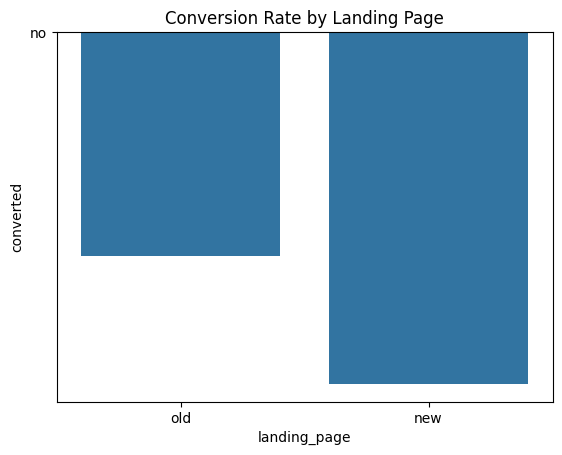

In [ ]:
sns.barplot(x='landing_page', y='converted', data=data, ci=None)
plt.title("Conversion Rate by Landing Page")
plt.show()

- The conversion rate appears higher for the new landing page compared to the old one, suggesting the new design may be more effective at driving conversions.

### **2. Hypotheses**

- H₀: Conversion rate (new) ≤ Conversion rate (old).

- H₁: Conversion rate (new) > Conversion rate (old).

### **3. Appropriate Test**

- Comparing two proportions → Two-proportion z-test (one-tailed).

To compare the conversion rate (proportion of users converted) between the new and old landing pages, a **two-proportion z-test** is used as we are comparing proportions from two independent groups.

### **4. Decide the significance level**

Here, we select @ = 0.05

### **5. Data Prep**

In [ ]:
# Strip spaces and standardize casing
data['converted'] = data['converted'].str.strip().str.capitalize()

# Map Yes → 1, No → 0
data['converted'] = data['converted'].map({'Yes':1, 'No':0})


In [ ]:
import statsmodels.api as sm

conv_new = data[data['landing_page']=='new']['converted']
conv_old = data[data['landing_page']=='old']['converted']

success = [conv_new.sum(), conv_old.sum()]
nobs = [conv_new.count(), conv_old.count()]

### **6. Calculate p-value**

In [ ]:
stat, p = sm.stats.proportions_ztest(success, nobs, alternative='larger')
print("p-value:", p)

p-value: 0.008026308204056278


### **7. Compare the p-value with @**

In [ ]:
if p < 0.05:
    print(f'As the p-value {p} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### **8. Inference**

- If p ≤ 0.05 → New page has significantly higher conversion rate.

- If p > 0.05 → No significant evidence of higher conversion.

The new page has a statistically significant higher conversion rate than the old page (p = 0.008 < 0.05).

## **3. Does the converted status depend on the preferred language?**

### **1. Perform Visual Analysis**

In [ ]:
# Now map yes/no to 1/0
data['converted'] = data['converted'].map({'yes':1, 'no':0})

/tmp/ipython-input-1410481253.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='language_preferred', y='converted', data=data, ci=None)


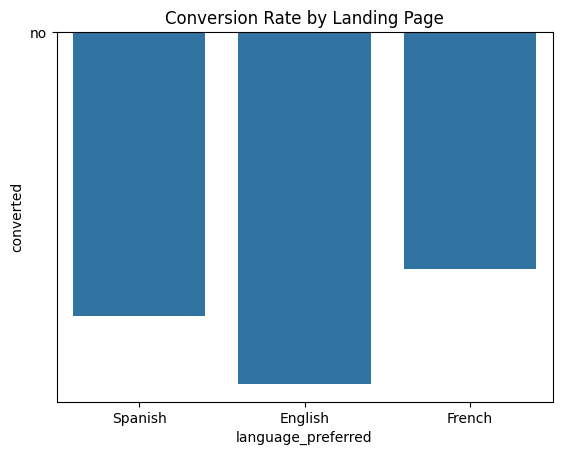

In [ ]:
sns.barplot(x='language_preferred', y='converted', data=data, ci=None)
plt.title("Conversion Rate by Landing Page")
plt.show()

- Among the languages, English users show the highest conversion rate (~65%), followed by Spanish (~53%), while French has the lowest (~44%), suggesting language preference may influence conversion effectiveness.

### **2. Hypotheses**

- H₀: Conversion status is independent of language preference.

- H₁: Conversion status depends on language preference.

### **3. Appropriate Test**

- Chi-Square Test of Independence (categorical vs categorical).

To determine if the converted status depends on the preferred language, a **Chi-Square Test of Independence** is conducted as we are analyzing the relationship between two categorical variables. This test allows us to determine if the distribution of one categorical variable (converted status) is independent of the distribution of the other categorical variable (preferred language).

### **4. Decide the significance level**

Here, we select @ = 0.05

### **5. Data Prep**

In [ ]:
import scipy.stats as stats
contingency = pd.crosstab(data['language_preferred'], data['converted'])

### **6. Calculate p-value**

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("p-value:", p)

p-value: 0.2129888748754345


### **7. Compare the p-value with @**

In [ ]:
if p < 0.05:
    print(f'As the p-value {p} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### **8. Inference**

- If p ≤ 0.05 → Conversion depends on language.

- If p > 0.05 → Conversion is independent of language.

The p-value (0.213) is greater than 0.05, indicating that language does not significantly affect conversion.

## **4. Is the time spent on the new page the same for the different language users?**

### **1. Perform Visual Analysis**

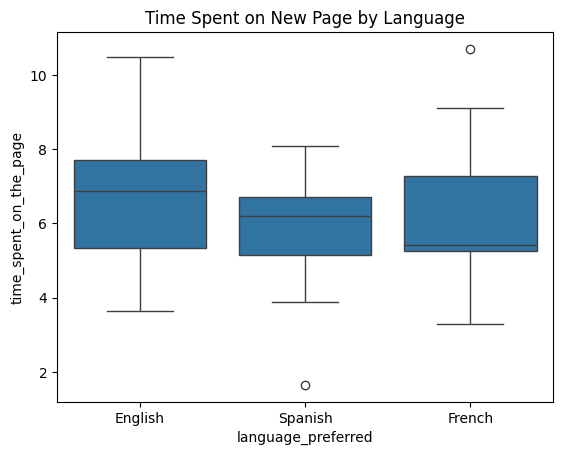

In [ ]:
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=data[data['landing_page']=='new'])
plt.title("Time Spent on New Page by Language")
plt.show()

- English users spend the most consistent and slightly higher average time on the new page.

- Spanish users spend the least time overall, with a narrower spread.

- French users show more variation — some spend a lot of time, but the median is lower than English.

English users not only convert more but also stay engaged longer, while Spanish users show lower engagement and conversion.

### **2. Hypotheses**

- H₀: Mean time spent is equal across all languages.

- H₁: At least one language group has a different mean.

### **3. Appropriate Test**

- One-way ANOVA (if assumptions hold).

- Kruskal-Wallis test (if assumptions fail).

To determine if the time spent on the new page is the same for different language users, a **One-Way ANOVA** is employed to compare the means of a continuous variable (time spent) across multiple language groups (the different language preferences). The Kruskal-Wallis test would be considered if the assumptions for the ANOVA were not met.

### **4. Decide the significance level**

Here, we select @ = 0.05

### **5. Data Prep**

In [ ]:
new_page = data[data['landing_page']=='new']
groups = [group['time_spent_on_the_page'].values for _, group in new_page.groupby('language_preferred')]

### **6. Calculate p-value**

In [ ]:
stat, p = f_oneway(*groups)   # if assumptions hold
print("ANOVA p-value:", p)

ANOVA p-value: 0.43204138694325955


### **7. Compare the p-value with @**

In [ ]:
if p < 0.05:
    print(f'As the p-value {p} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### **8. Inference**

- If p ≤ 0.05 → At least one language has a different mean time spent.

- If p > 0.05 → Mean time is the same across languages.

Since the p-value (0.432) is greater than 0.05, we fail to reject the null hypothesis, indicating that the mean time spent is similar across languages.

## **Conclusion**

Based on the statistical analysis at a significance level of 5%:

1.  **Time Spent on Page:** The analysis shows a statistically significant difference in the time users spend on the new landing page compared to the old one (p-value < 0.05). Specifically, users spend *more* time on the new landing page.

2.  **Conversion Rate:** The new landing page has a statistically significant higher conversion rate than the old landing page (p-value < 0.05). This indicates that the new design is more effective at converting visitors into subscribers.

3.  **Converted Status and Language:** The converted status does *not* significantly depend on the preferred language (p-value > 0.05). While the visual analysis showed some differences in conversion rates across languages, the statistical test indicates that these differences are not statistically significant at the 5% level.

4.  **Time Spent on New Page and Language:** The time spent on the new landing page is statistically the *same* for different language users (p-value > 0.05). Despite some visual differences in the boxplot, the ANOVA test indicates that the mean time spent does not differ significantly across the language groups on the new page.

## **Business Recommendations**

Based on the conclusions, here are some business recommendations for E-news Express:

1.  **Implement the New Landing Page:** The new landing page is significantly better than the old one in terms of both the time users spend on the page and the conversion rate. It is strongly recommended to fully implement the new landing page for all users to increase subscriber acquisition.

2.  **Focus on Content and Engagement:** Since the new page increases the time spent, continue to focus on providing engaging and relevant content to keep users on the page longer. The new design seems to be successful in this regard.

3.  **Further Investigate Language and Conversion (Optional):** Although the statistical test showed no significant dependency between language and conversion, the visual analysis did suggest some differences (English having a higher conversion rate). While not statistically significant at the 5% level in this experiment, E-news Express could consider further exploring potential reasons for these observed differences in a larger study or through qualitative analysis. This could involve tailoring content or offers to specific language groups, though the current data doesn't strongly support this as a primary focus based on the statistical test.

4.  **Monitor and Iterate:** After implementing the new landing page, continue to monitor key metrics like time spent and conversion rate. A/B testing is an iterative process, and further analysis and experimentation can help optimize the landing page even further in the future.